``` Import Dependency ```

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


``` Gathering Data ```

In [54]:
dim_customer = pd.read_csv("/content/olist_customers_dataset.csv")
dim_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [55]:
dim_order = pd.read_csv("/content/olist_orders_dataset.csv")
dim_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [56]:
dim_product = pd.read_csv("/content/olist_products_dataset.csv")
dim_product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [57]:
dim_order_item = pd.read_csv("/content/olist_order_items_dataset.csv")
dim_order_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [58]:
dim_order_payment = pd.read_csv("/content/olist_order_payments_dataset.csv")
dim_order_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [59]:
dim_seller = pd.read_csv("/content/olist_sellers_dataset.csv")
dim_seller.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [60]:
fact_sales = pd.read_excel("/content/Fact_Sales.xls")
fact_sales.head()

,order_id,customer_id,order_status,payment_type,seller_id,order_item_id,product_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,credit_card,48436dade18ac8b2bce089ec2a041202,1,4244733e06e7ecb4970a6e2683c13e61,58.90
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,credit_card,dd7ddc04e1b6c2c614352b383efe2d36,1,e5f2d52b802189ee658865ca93d83a8f,239.90
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,credit_card,5b51032eddd242adc84c38acab88f23d,1,c777355d18b72b67abbeef9df44fd0fd,199.00
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,credit_card,9d7a1d34a5052409006425275ba1c2b4,1,7634da152a4610f1595efa32f14722fc,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,credit_card,df560393f3a51e74553ab94004ba5c87,1,ac6c3623068f30de03045865e4e10089,199.90


``` Cleansing Data ```

In [61]:
dim_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [62]:
dim_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [63]:
dim_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [64]:
dim_order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [65]:
dim_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [66]:
dim_seller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [67]:
print("Data kosong pada dim_seller:", dim_seller.isnull().sum())

Data kosong pada dim_seller: seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


In [68]:
print("Data kosong pada dim_order:", dim_order.isnull().sum())

Data kosong pada dim_order: order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [69]:
print("Data kosong pada dim_customer:", dim_customer.isnull().sum())

Data kosong pada dim_customer: customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [70]:
print("Data kosong pada dim_product:", dim_product.isnull().sum())

Data kosong pada dim_product: product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


In [71]:
print("Data kosong pada dim_order_item:", dim_order_item.isnull().sum())

Data kosong pada dim_order_item: order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


In [72]:
print("Data kosong pada dim_order_payment:", dim_order_payment.isnull().sum())

Data kosong pada dim_order_payment: order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


In [73]:
print("Data duplikasi dim_order:", dim_order.duplicated().sum())

Data duplikasi dim_order: 0


In [74]:
print("Data duplikasi dim_customer:", dim_customer.duplicated().sum())

Data duplikasi dim_customer: 0


In [75]:
print("Data duplikasi dim_order_item:", dim_order_item.duplicated().sum())

Data duplikasi dim_order_item: 0


In [76]:
print("Data duplikasi dim_seller:", dim_seller.duplicated().sum())

Data duplikasi dim_seller: 0


In [77]:
print("Data duplikasi dim_product:", dim_product.duplicated().sum())

Data duplikasi dim_product: 0


In [78]:
print("Data duplikasi dim_order_payment:", dim_order_payment.duplicated().sum())

Data duplikasi dim_order_payment: 0


In [79]:
dim_order.dropna(axis=0, inplace=True)

In [80]:
dim_order.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


In [81]:
dim_product.dropna(axis=0, inplace=True)

In [82]:
dim_product.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


``` Visualisasi & Analisis ```

`` KPI 1: Total Pendapatan ``

In [83]:
# Calculate total revenue per order
revenue_by_order = fact_sales.groupby('order_id')['price'].sum().reset_index()
revenue_by_order.columns = ['order_id', 'price']

# Display descriptive statistics
print("Statistik Deskriptif Total Pendapatan per Order:")
print(revenue_by_order['price'].describe())

Statistik Deskriptif Total Pendapatan per Order:
count    3086.000000
mean      176.868065
std       361.710031
min         3.490000
25%        41.992500
50%        89.900000
75%       168.942500
max      6735.000000
Name: total_revenue, dtype: float64


`` KPI 2: Jumlah Pesanan``

In [84]:
# Hitung jumlah pesanan
jumlah_pesanan = dim_order['order_id'].nunique()

print(f"Jumlah Pesanan: {jumlah_pesanan}")

Jumlah Pesanan: 96461


`` KPI 3: Nilai Rata-rata Pesanan ``

In [85]:
# Calculate Average Order Value
average_order_value = revenue_by_order['price'].mean()

# Display the result
print(f'Nilai Rata-rata Pesanan (Average Order Value): {average_order_value:.2f}')

# Regression Analysis for KPI 3 (Predicting total_revenue based on relevant features)

# Merge datasets to get more features for regression
order_revenue_df = pd.merge(dim_order, revenue_by_order, on='order_id', how='inner')

# Select features and target variable for regression
features = ['order_status']
target = 'price'

# Drop rows with missing values in selected features or target
regression_df = order_revenue_df.dropna(subset=features + [target])

# Separate features (X) and target (y)
X = regression_df[features]
y = regression_df[target]

# Apply one-hot encoding to categorical features
X = pd.get_dummies(X, columns=features, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n--- Regression Analysis ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Display model coefficients
print("\nModel Coefficients:")
for i, col in enumerate(X.columns):
    print(f"{col}: {model.coef_[i]:.2f}")

Nilai Rata-rata Pesanan (Average Order Value): 176.87

--- Regression Analysis ---
Mean Squared Error (MSE): 127324.40
Root Mean Squared Error (RMSE): 356.83
R-squared (R2): -0.00

Model Coefficients:
order_status_delivered: 0.00


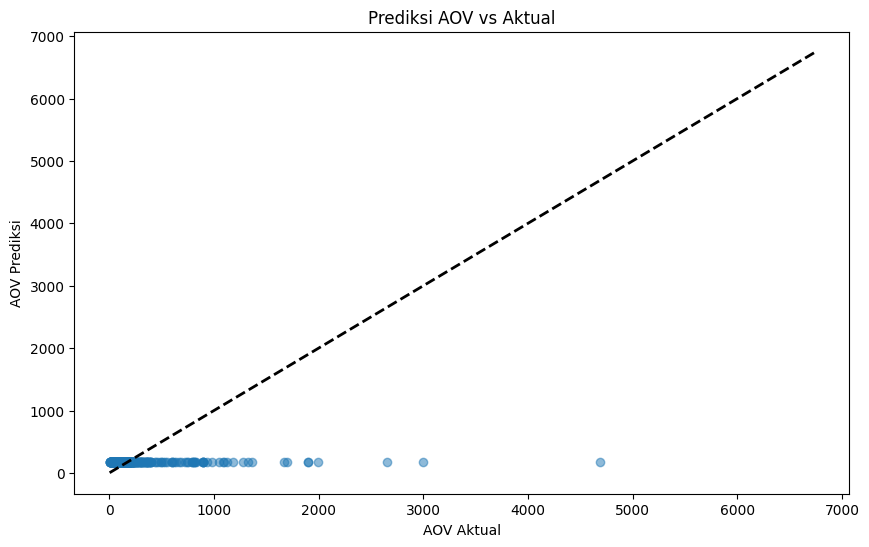

In [86]:
# Visualisasi hasil regresi
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Prediksi AOV vs Aktual')
plt.xlabel('AOV Aktual')
plt.ylabel('AOV Prediksi')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

### `` KPI 4: Jumlah Pelanggan Unik``

Jumlah Pelanggan Unik (Number of Unique Customers): 96096

Data RFM (Recency, Frequency, Monetary):
                 customer_unique_id  Recency  Frequency  Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      111          1    129.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f      114          1     18.90
2  0000f46a3911fa3c0805444483337064      536          1     69.00
3  0000f6ccb0745a6a4b88665a16c9f078      320          1     25.99
4  0004aac84e0df4da2b147fca70cf8255      287          1    180.00


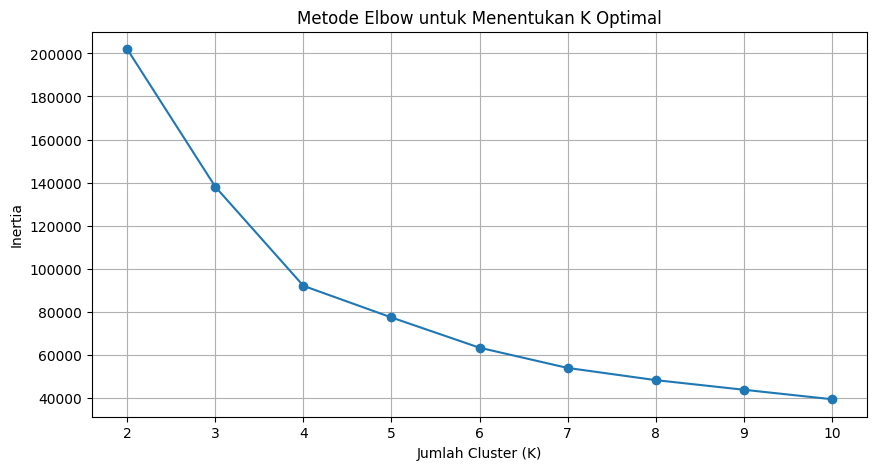

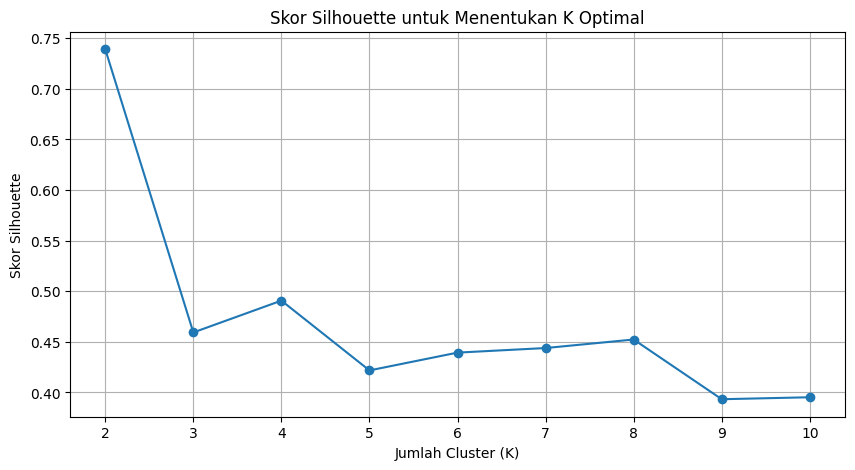


Analisis Karakteristik Setiap Cluster:
   Cluster  Avg_Recency  Avg_Frequency  Avg_Monetary  Num_Customers
0        0   386.515639       1.000000    139.266013          38494
1        1   127.226336       1.000000    136.111335          52042
2        2   219.405916       2.111547    276.063311           2806


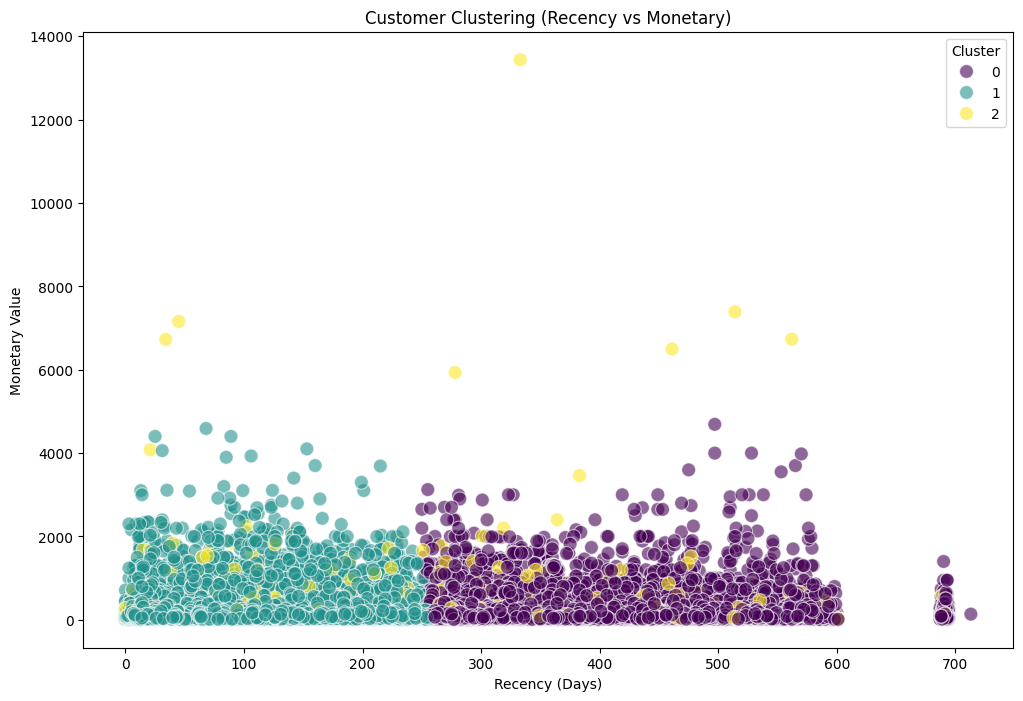

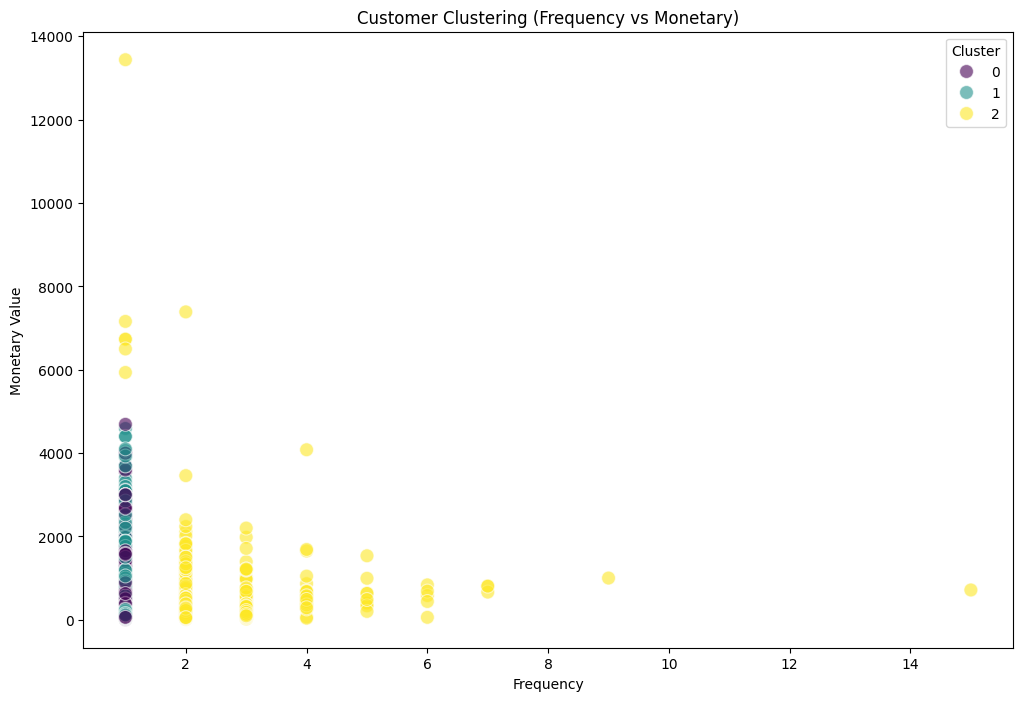

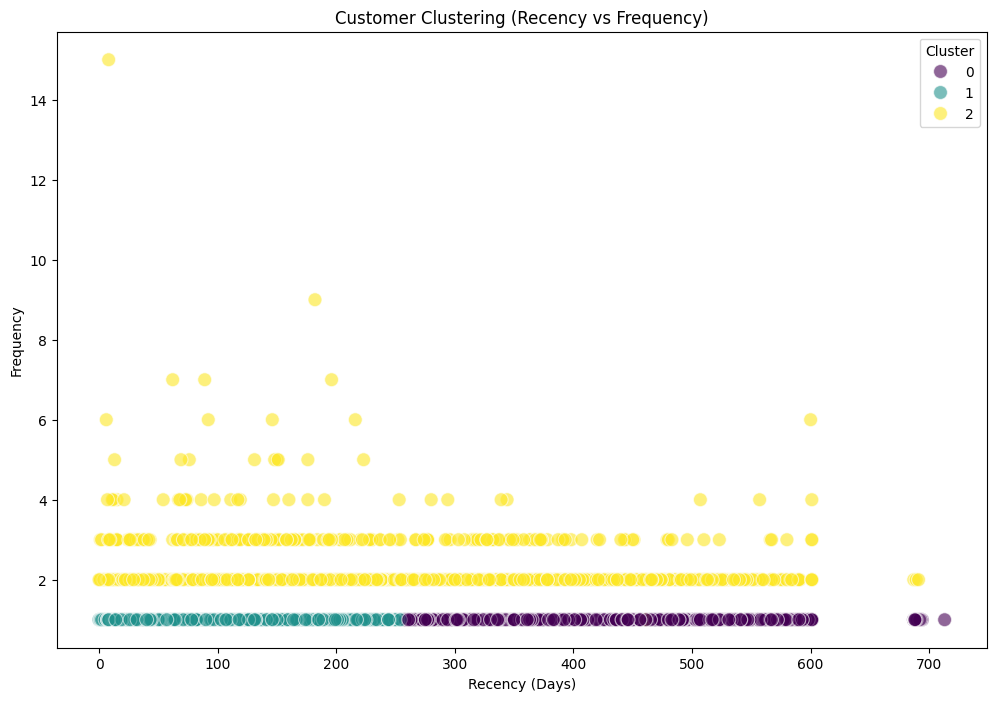

In [87]:
# Hitung Jumlah Pelanggan Unik
jumlah_pelanggan_unik = dim_customer['customer_unique_id'].nunique()

# Tampilkan hasilnya
print(f'Jumlah Pelanggan Unik (Number of Unique Customers): {jumlah_pelanggan_unik}')

# Menggunakan data dari order_payments untuk Recency, Frequency, Monetary (RFM).


# Gabungkan data order dan order item untuk mendapatkan informasi transaksi per pelanggan
customer_order_item_df = pd.merge(dim_order, dim_order_item, on='order_id')
customer_order_item_df = pd.merge(customer_order_item_df, dim_customer, on='customer_id')

# Konversi kolom tanggal ke datetime
customer_order_item_df['order_purchase_timestamp'] = pd.to_datetime(customer_order_item_df['order_purchase_timestamp'])

# Temukan tanggal terbaru dalam dataset untuk menghitung Recency
latest_date = customer_order_item_df['order_purchase_timestamp'].max()

# Hitung RFM untuk setiap pelanggan unik
rfm_df = customer_order_item_df.groupby('customer_unique_id').agg(
    Recency=('order_purchase_timestamp', lambda date: (latest_date - date.max()).days),
    Frequency=('order_id', 'nunique'),
    Monetary=('price', 'sum')
).reset_index()

print("\nData RFM (Recency, Frequency, Monetary):")
print(rfm_df.head())

# Scaling data RFM sebelum clustering
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])

# Menentukan jumlah cluster optimal menggunakan metode Elbow dan Silhouette
inertia = []
silhouette_scores = []
k_range = range(2, 11)  # Coba dari 2 hingga 10 cluster

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Tambahkan n_init
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(rfm_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plot metode Elbow
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Metode Elbow untuk Menentukan K Optimal')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Plot metode Silhouette
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Skor Silhouette untuk Menentukan K Optimal')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Skor Silhouette')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Berdasarkan plot Elbow dan Silhouette, pilih K yang dirasa paling optimal.

optimal_k = 3 # Ganti dengan K optimal berdasarkan analisis plot

# Terapkan K-Means dengan K optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10) # Tambahkan n_init
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Analisis karakteristik setiap cluster
cluster_analysis = rfm_df.groupby('Cluster').agg(
    Avg_Recency=('Recency', 'mean'),
    Avg_Frequency=('Frequency', 'mean'),
    Avg_Monetary=('Monetary', 'mean'),
    Num_Customers=('customer_unique_id', 'count')
).reset_index()

print("\nAnalisis Karakteristik Setiap Cluster:")
print(cluster_analysis)

# Visualisasi hasil clustering (misalnya, Recency vs Monetary)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm_df, palette='viridis', s=100, alpha=0.6)
plt.title('Customer Clustering (Recency vs Monetary)')
plt.xlabel('Recency (Days)')
plt.ylabel('Monetary Value')
plt.show()

# Visualisasi hasil clustering (Frequency vs Monetary)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Frequency', y='Monetary', hue='Cluster', data=rfm_df, palette='viridis', s=100, alpha=0.6)
plt.title('Customer Clustering (Frequency vs Monetary)')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.show()

# Visualisasi hasil clustering (Recency vs Frequency)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Recency', y='Frequency', hue='Cluster', data=rfm_df, palette='viridis', s=100, alpha=0.6)
plt.title('Customer Clustering (Recency vs Frequency)')
plt.xlabel('Recency (Days)')
plt.ylabel('Frequency')
plt.show()

`` KPI 5:  Kategori Produk Terlaris ``


Kategori Produk Terlaris (Most Selling Product Categories):
     product_category_name  number_of_sales
13         cama_mesa_banho            11115
11            beleza_saude             9670
32           esporte_lazer             8641
54        moveis_decoracao             8334
44  informatica_acessorios             7827
72   utilidades_domesticas             6964
66      relogios_presentes             5991
70               telefonia             4545
40      ferramentas_jardim             4347
8               automotivo             4235


<ipython-input-88-3750044100>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='number_of_sales', y='product_category_name', data=product_category_sales_sorted.head(10), palette='viridis')


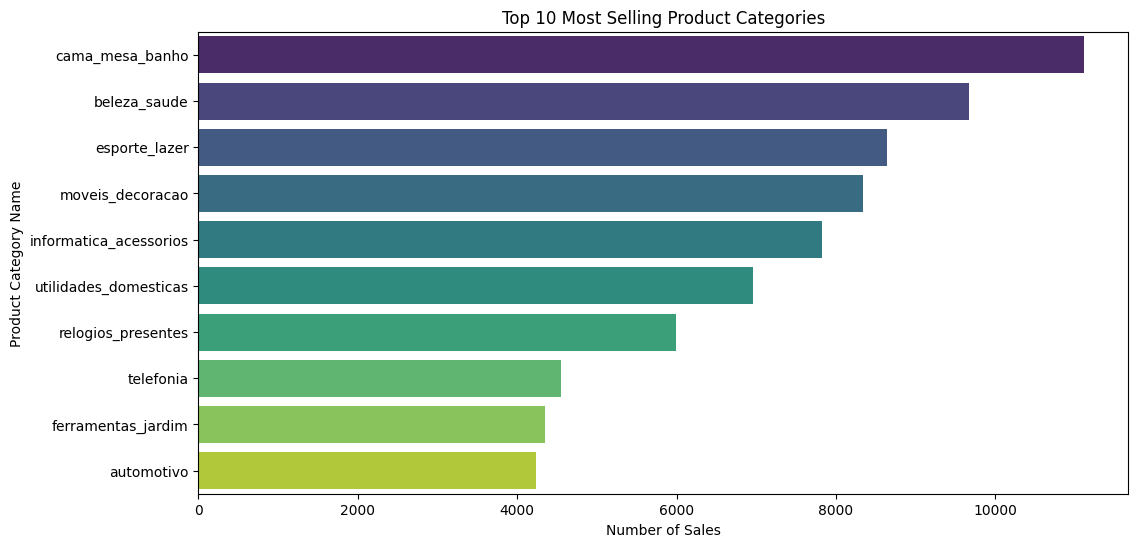

<ipython-input-88-3750044100>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_revenue', y='product_category_name', data=product_category_revenue_sorted.head(10), palette='magma')



Kategori Produk dengan Pendapatan Terbesar (Top Product Categories by Revenue):
     product_category_name  total_revenue
11            beleza_saude     1258681.34
66      relogios_presentes     1205005.68
13         cama_mesa_banho     1036988.68
32           esporte_lazer      988048.97
44  informatica_acessorios      911954.32
54        moveis_decoracao      729762.49
26              cool_stuff      635290.85
72   utilidades_domesticas      632248.66
8               automotivo      592720.11
40      ferramentas_jardim      485256.46


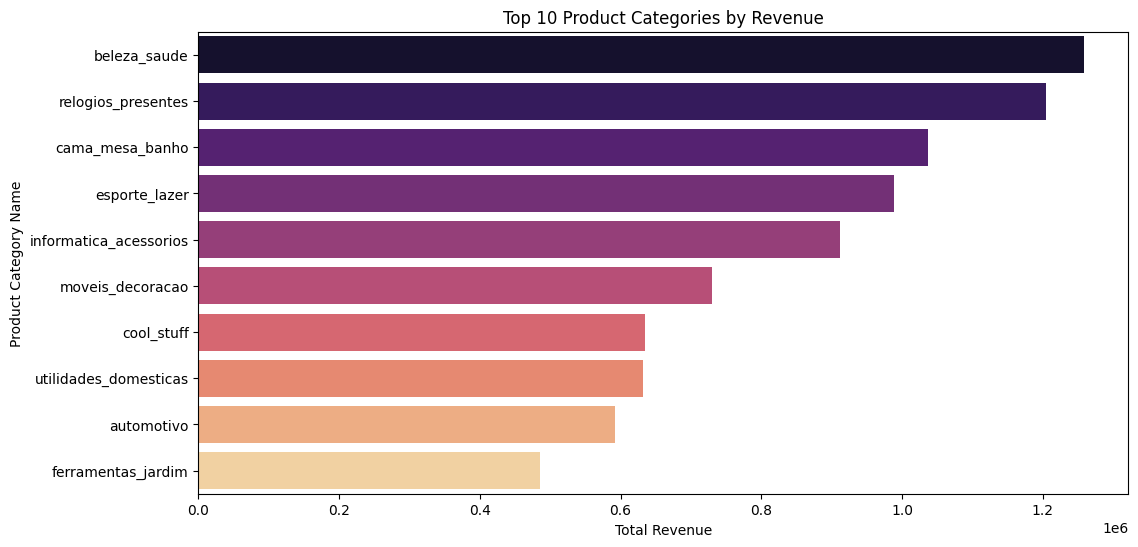

In [88]:
# Gabungkan data order item dan product untuk mendapatkan nama kategori produk
order_product_df = pd.merge(dim_order_item, dim_product, on='product_id', how='inner')

# Hitung jumlah penjualan per kategori produk
product_category_sales = order_product_df.groupby('product_category_name')['order_item_id'].count().reset_index()
product_category_sales.columns = ['product_category_name', 'number_of_sales']

# Urutkan kategori produk berdasarkan jumlah penjualan secara menurun
product_category_sales_sorted = product_category_sales.sort_values(by='number_of_sales', ascending=False)

print("\nKategori Produk Terlaris (Most Selling Product Categories):")
print(product_category_sales_sorted.head(10)) # Tampilkan 10 kategori teratas

# Visualisasi kategori produk terlaris
plt.figure(figsize=(12, 6))
sns.barplot(x='number_of_sales', y='product_category_name', data=product_category_sales_sorted.head(10), palette='viridis')
plt.title('Top 10 Most Selling Product Categories')
plt.xlabel('Number of Sales')
plt.ylabel('Product Category Name')
plt.show()

# Analisis lebih lanjut: Nilai penjualan per kategori
product_category_revenue = order_product_df.groupby('product_category_name')['price'].sum().reset_index()
product_category_revenue.columns = ['product_category_name', 'total_revenue']

# Urutkan kategori produk berdasarkan total pendapatan secara menurun
product_category_revenue_sorted = product_category_revenue.sort_values(by='total_revenue', ascending=False)

print("\nKategori Produk dengan Pendapatan Terbesar (Top Product Categories by Revenue):")
print(product_category_revenue_sorted.head(10)) # Tampilkan 10 kategori teratas berdasarkan pendapatan

# Visualisasi kategori produk dengan pendapatan terbesar
plt.figure(figsize=(12, 6))
sns.barplot(x='total_revenue', y='product_category_name', data=product_category_revenue_sorted.head(10), palette='magma')
plt.title('Top 10 Product Categories by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Category Name')
plt.show()

In [89]:
# dim_order.to_csv('dim_order_cleaned.csv', index=False)
# dim_product.to_csv('dim_product_cleaned.csv', index=False)